In [ ]:
import pandas as pd
import os
import sys
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Mount with Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_f1 = pd.read_csv("/content/drive/MyDrive/Data Open Championship 2022/Cleaned dataset/Financial_F1.csv")

In [ ]:
!ls ../cleaned_data

ls: cannot access '../cleaned_data': No such file or directory


In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/Data Open Championship 2022/Cleaned dataset/Final_Education_Fairness.csv")

In [ ]:
df1.loc[df1["unitid"]==100654]

,Unnamed: 0.1,unitid,year,%Male,%Female,%American Indian,%Asian,%Black,%Hispanic,%Hawaiian/Pacific Islander,...,% income level 4 aid receiver,% income level 5 aid receiver,% income level 1,% income level 2,% income level 3,% income level 4,% income level 5,Gini_income,institution_type,education_equity_score
0,0,100654,2020,0.385213,0.614787,0.002287,0.002134,0.868750,0.007774,0.000915,...,0.848485,0.653846,0.579310,0.186207,0.104828,0.045517,0.035862,0.615380,public_nonprofit,0.444505
1271,6169,100654,2019,0.392911,0.607089,0.002543,0.002393,0.877206,0.007777,0.001197,...,0.708333,0.684211,0.601036,0.195164,0.093264,0.041451,0.032815,0.589173,public_nonprofit,0.431873
2552,12441,100654,2018,0.403657,0.596343,0.001844,0.002919,0.886447,0.007990,0.001537,...,0.518519,0.812500,0.617792,0.186161,0.100494,0.044481,0.026359,0.570904,public_nonprofit,0.421571
3819,19002,100654,2017,0.415363,0.584637,0.002347,0.003598,0.892209,0.006727,0.001721,...,0.860465,0.791667,0.498834,0.178322,0.102564,0.050117,0.027972,0.705552,public_nonprofit,0.463913
5084,25787,100654,2016,0.429755,0.570245,0.002274,0.003411,0.893779,0.005847,0.001462,...,1.000000,1.000000,0.643595,0.177686,0.077479,0.042355,0.013430,0.546236,public_nonprofit,0.411441
6323,32738,100654,2015,0.447548,0.552452,0.002044,0.003576,0.901567,0.005960,0.001703,...,0.842105,0.933333,0.624196,0.166023,0.097812,0.048906,0.019305,0.570484,public_nonprofit,0.416240


In [ ]:
df1.columns

Index(['Unnamed: 0.1', 'unitid', 'year', '%Male', '%Female',
       '%American Indian', '%Asian', '%Black', '%Hispanic',
       '%Hawaiian/Pacific Islander', '%White', '%2 Or More Races',
       '%Nonresident Alien', '%Men Graduated', '%Women Graduated',
       '%American Indian Graduated', '%Asian Graduated', '%Black Graduated',
       '%Hispanic Graduated', '%Hawaiian/Pacific Islander Graduated',
       '%White Graduated', '%2 or More Races Graduated',
       '%Nonresident Alien Graduated', 'Gini_gender', 'Gini_ethnics',
       'Unnamed: 0', '% income level 1 aid receiver',
       '% income level 2 aid receiver', '% income level 3 aid receiver',
       '% income level 4 aid receiver', '% income level 5 aid receiver',
       '% income level 1', '% income level 2', '% income level 3',
       '% income level 4', '% income level 5', 'Gini_income',
       'institution_type', 'education_equity_score'],
      dtype='object')

In [ ]:
df_f1 = pd.read_csv("../cleaned_data/Financial_F1.csv")
df_f2 = pd.read_csv("../cleaned_data/Financial_F2.csv")
df_f3 = pd.read_csv("../cleaned_data/Financial_F3.csv")

In [ ]:
df_f1.shape, df_f2.shape, df_f3.shape

((11824, 31), (11198, 31), (15352, 24))

In [ ]:
# transfer year 1415 to 15...
def map_year(df):
    year_map = {1415: 2015, 1516: 2016, 1617: 2017, 1718: 2018, 1819: 2019, 1920:2020}
    year_mapped = df['year'].to_list()

    for i in range(len(year_mapped)):
        year_mapped[i] = year_map[year_mapped[i]]
    df['year'] = year_mapped
    return df

In [ ]:
df_f1 = map_year(df_f1)

In [ ]:
df_f1["Total Profit"]

0         3237071.0
1        31527362.0
2       -17322838.0
3        -9835537.0
4         1673867.0
            ...    
11819     -197804.0
11820    54884482.0
11821    39991596.0
11822           NaN
11823           NaN
Name: Total Profit, Length: 11824, dtype: float64

In [ ]:
df_type = pd.read_csv("../cleaned_data/institutional_type_list.csv")
df_type

,Unnamed: 0,institution_type,unitid
0,0,public,100654
1,1,public,100663
2,2,public,100706
3,3,public,100724
4,4,public,100733
...,...,...,...
7448,7448,private_profit,496052
7449,7449,private_profit,496061
7450,7450,private_profit,496265
7451,7451,private_profit,496371


In [ ]:
selected_cols = ["unitid", "Total Profit", "year"]
df_profit = df_f1[selected_cols]
df_profit

,unitid,Total Profit,year
0,100654,3237071.0,2015
1,100663,31527362.0,2015
2,100706,-17322838.0,2015
3,100724,-9835537.0,2015
4,100733,1673867.0,2015
...,...,...,...
11819,491844,-197804.0,2020
11820,492263,54884482.0,2020
11821,492689,39991596.0,2020
11822,493725,NaN,2020


In [ ]:
selected = ["Total Profit", "year"]
df_profit = df_f1[selected]
df_profit

,Total Profit,year
0,3237071.0,2015
1,31527362.0,2015
2,-17322838.0,2015
3,-9835537.0,2015
4,1673867.0,2015
...,...,...
11819,-197804.0,2020
11820,54884482.0,2020
11821,39991596.0,2020
11822,NaN,2020


In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(x='year', y='Total Profit',data=df_profit).set(title='Total Profit of Public Institutions from 2015 - 2020')

In [ ]:
df = df1.merge(df_profit, how="inner", on=["unitid", "year"])

In [ ]:
df["institution_type"].value_counts()

public_nonprofit     7523
private_nonprofit      65
Name: institution_type, dtype: int64

In [ ]:
df_pri = df[df["institution_type"] == "private_nonprofit"]  # private, nonprofit
df_pub = df[df["institution_type"] == "public_nonprofit"]  # public

### Public schools

<AxesSubplot:xlabel='education_equity_score', ylabel='Total Profit'>

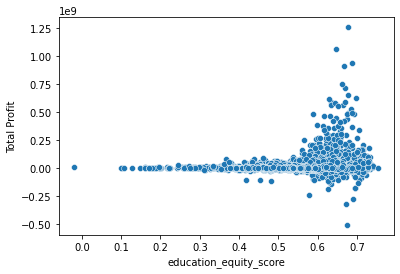

In [ ]:
sns.scatterplot(x=df_pub["education_equity_score"], y=df_pub["Total Profit"])

In [ ]:
df_pri.shape, df_pub.shape

((65, 40), (7523, 40))

<AxesSubplot:xlabel='Gini_ethnics', ylabel='Total Profit'>

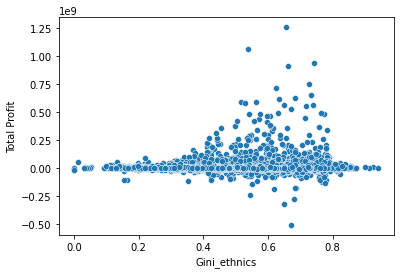

In [ ]:
sns.scatterplot(x=df_pub["Gini_ethnics"], y=df_pub["Total Profit"])

<AxesSubplot:xlabel='Gini_gender', ylabel='Total Profit'>

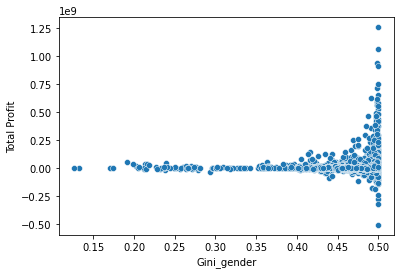

In [ ]:
sns.scatterplot(x=df_pub["Gini_gender"], y=df_pub["Total Profit"])

### Private schools

<AxesSubplot:xlabel='education_equity_score', ylabel='Total Profit'>

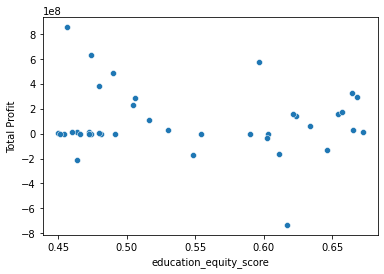

In [ ]:
sns.scatterplot(x=df_pri["education_equity_score"], y=df_pri["Total Profit"])

<AxesSubplot:xlabel='education_equity_score', ylabel='Total Profit'>

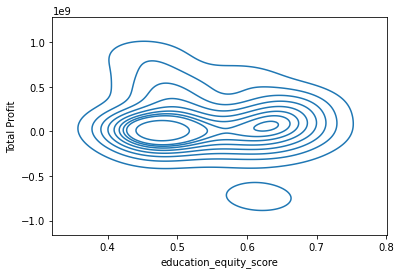

In [ ]:
sns.kdeplot(x=df_pri["education_equity_score"], y=df_pri["Total Profit"])

<AxesSubplot:xlabel='Gini_ethnics', ylabel='Total Profit'>

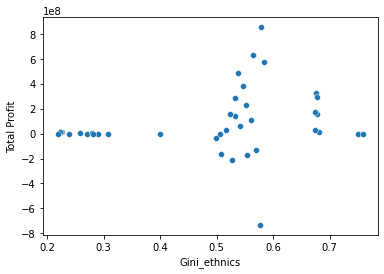

In [ ]:
sns.scatterplot(x=df_pri["Gini_ethnics"], y=df_pri["Total Profit"])

<AxesSubplot:xlabel='Gini_gender', ylabel='Total Profit'>

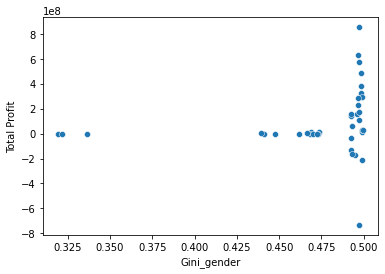

In [ ]:
sns.scatterplot(x=df_pri["Gini_gender"], y=df_pri["Total Profit"])